**Titanic Ship Case Study
Problem Description:**

 On April 15, 1912, during her maiden voyage, the Titanic sank after colliding 
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

1) One of the reasons that the shipwreck led 
to such loss of life was that there were not 
enough lifeboats for the passengers and crew.

2) Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upperclass.


The problem associated with the Titanic dataset is to predict whether a passenger survived the 
disaster or not. The dataset contains various features such as passenger class, age, gender, 
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can 
be used to build a predictive model to determine the likelihood of a passenger surviving the 
disaster. The dataset offers opportunities for feature engineering, data visualization, and model 
selection, making it a valuable resource for developing and testing data analysis and machine 
learning **skil**

2. Load the database

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


3. Perform Below Visualizations.

In [ ]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

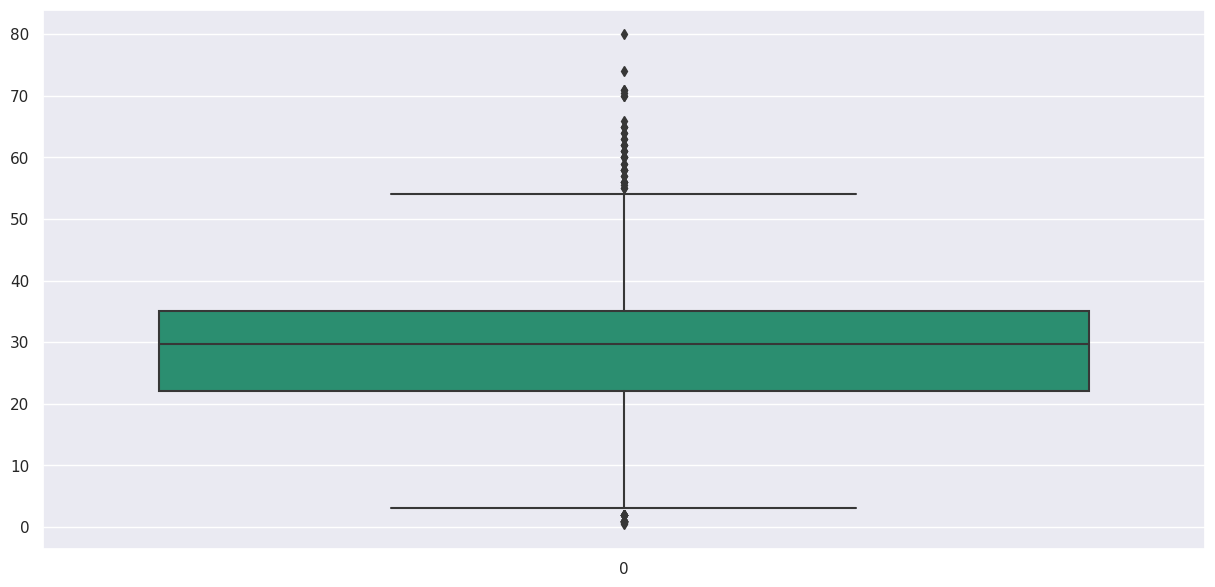

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df["age"], palette="Dark2")
plt.show()

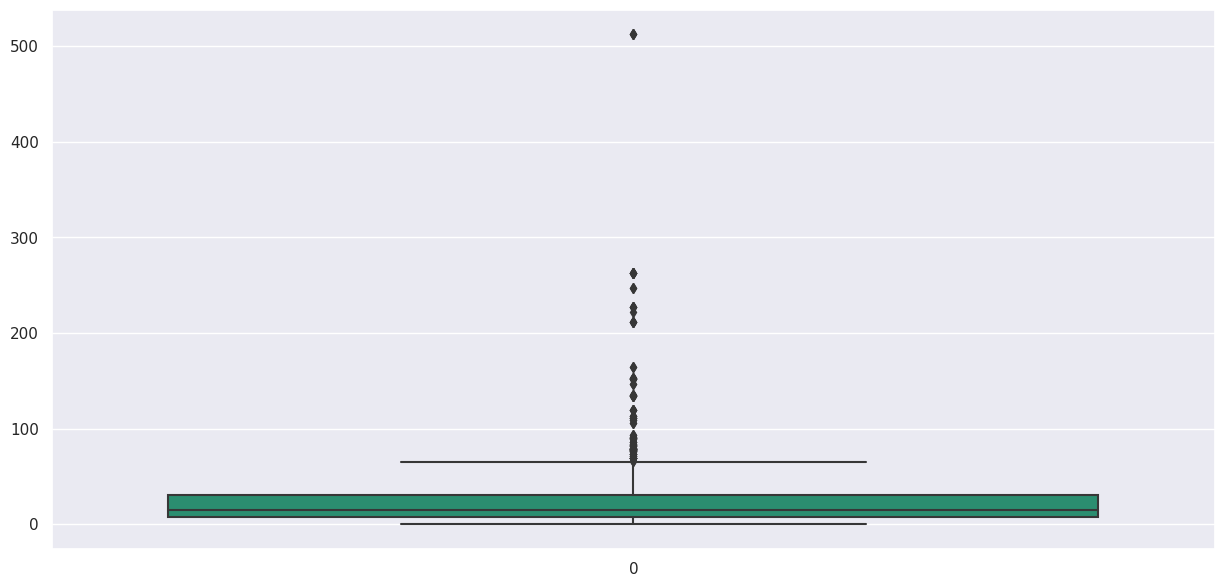

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df["fare"], palette="Dark2")
plt.show()

Count of females: 312
Proportion of females: 0.35095613048368957


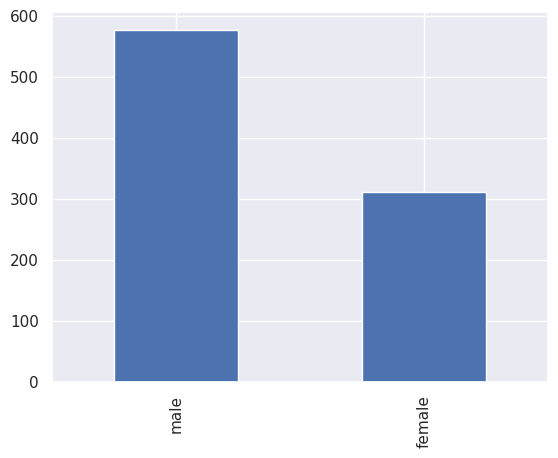

In [ ]:
import pandas as pd
female_count = df[df['sex'] == 'female'].shape[0]
total_count = df.shape[0]
female_proportion = female_count / total_count
print("Count of females:", female_count)
print("Proportion of females:", female_proportion)
df['sex'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['sex'], df['survived'])
result = chi2_contingency(contingency_table)
chi2 = result[0]
p_value = result[1]
print("Chi-square:", chi2)
print("P-value:", p_value)

Chi-square: 258.4266104463763
P-value: 3.7799096665576e-58


Contingency Table:
survived    0    1
sex               
female     81  231
male      468  109

Proportions:
survived         0         1
sex                         
female    0.259615  0.740385
male      0.811092  0.188908


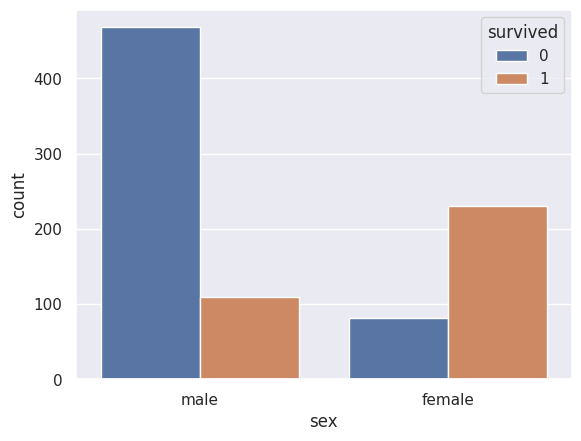

In [ ]:
import pandas as pd
import seaborn as sns
contingency_table = pd.crosstab(df['sex'], df['survived'])
sns.countplot(data=df, x='sex', hue='survived')
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("Contingency Table:")
print(contingency_table)
print("\nProportions:")
print(proportions)

<ipython-input-97-dd114b4238d9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_selected.corr()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-97-dd114b4238d9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster_label'] = kmeans.labels_


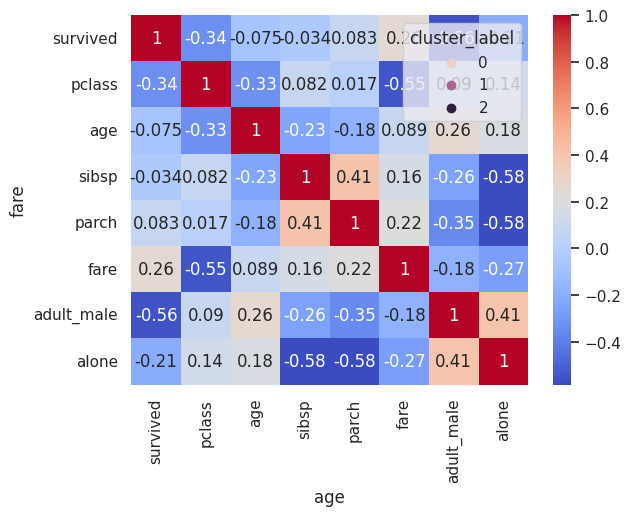

In [ ]:
import pandas as pd
import seaborn as sns
variables_of_interest = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

df_selected = df[variables_of_interest]
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df_cluster = df_selected[['age', 'fare']]  # Selecting specific variables for clustering
kmeans.fit(df_cluster)
df_cluster['cluster_label'] = kmeans.labels_
sns.scatterplot(data=df_cluster, x='age', y='fare', hue='cluster_label')
plt.show()

4. perform descriptive statitics on the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
##average of people survived
average=df['survived'].mean()
print(average)

0.3838383838383838


In [ ]:
##standard Deviation of people alive
std=df['survived'].std()
print(std)

0.4865924542648575


<ipython-input-87-f760942b818e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['survived'] == 0),'fare'] , color='gray',shade=True,label='not survived')
<ipython-input-87-f760942b818e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['survived'] == 1),'fare'] , color='g',shade=True, label='survived')


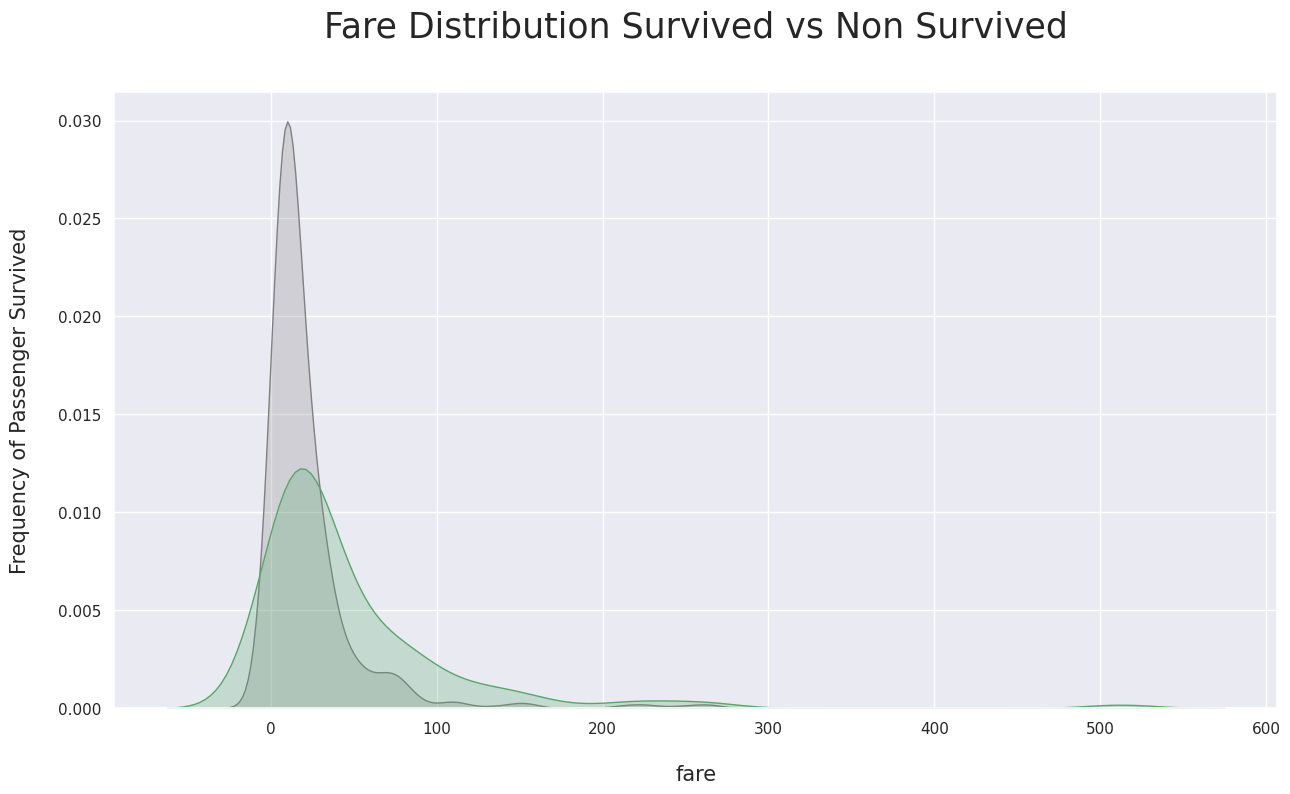

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['survived'] == 0),'fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['survived'] == 1),'fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("fare", fontsize = 15, labelpad = 20);

<Figure size 1000x800 with 0 Axes>

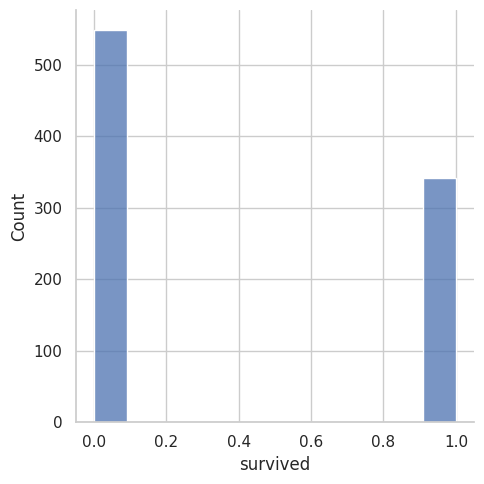

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.displot(x='survived', data=df)

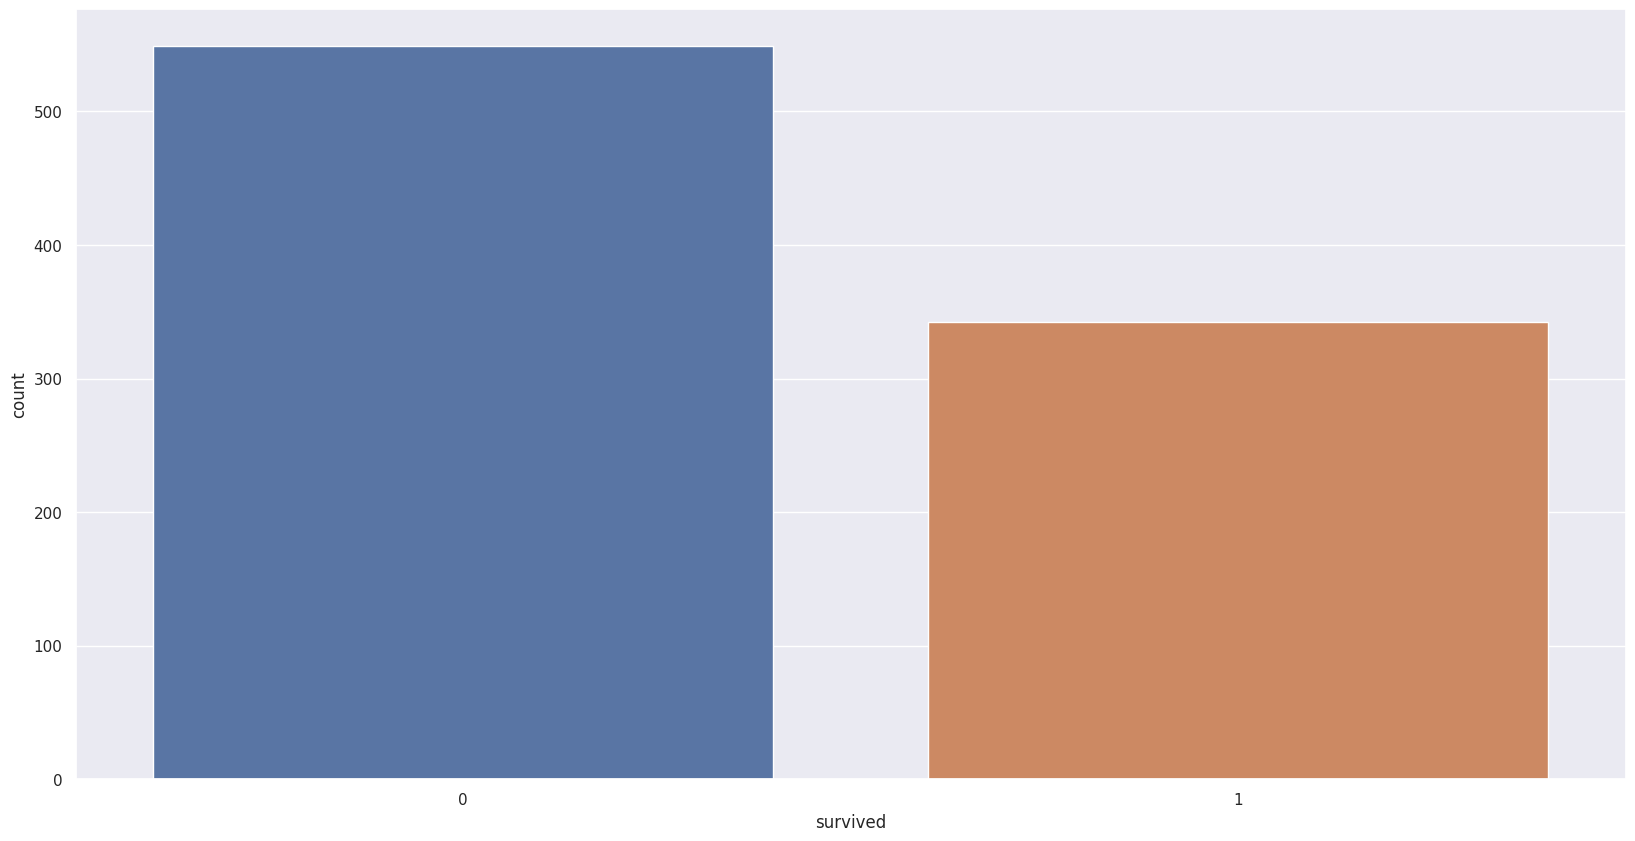

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='survived', data=df)

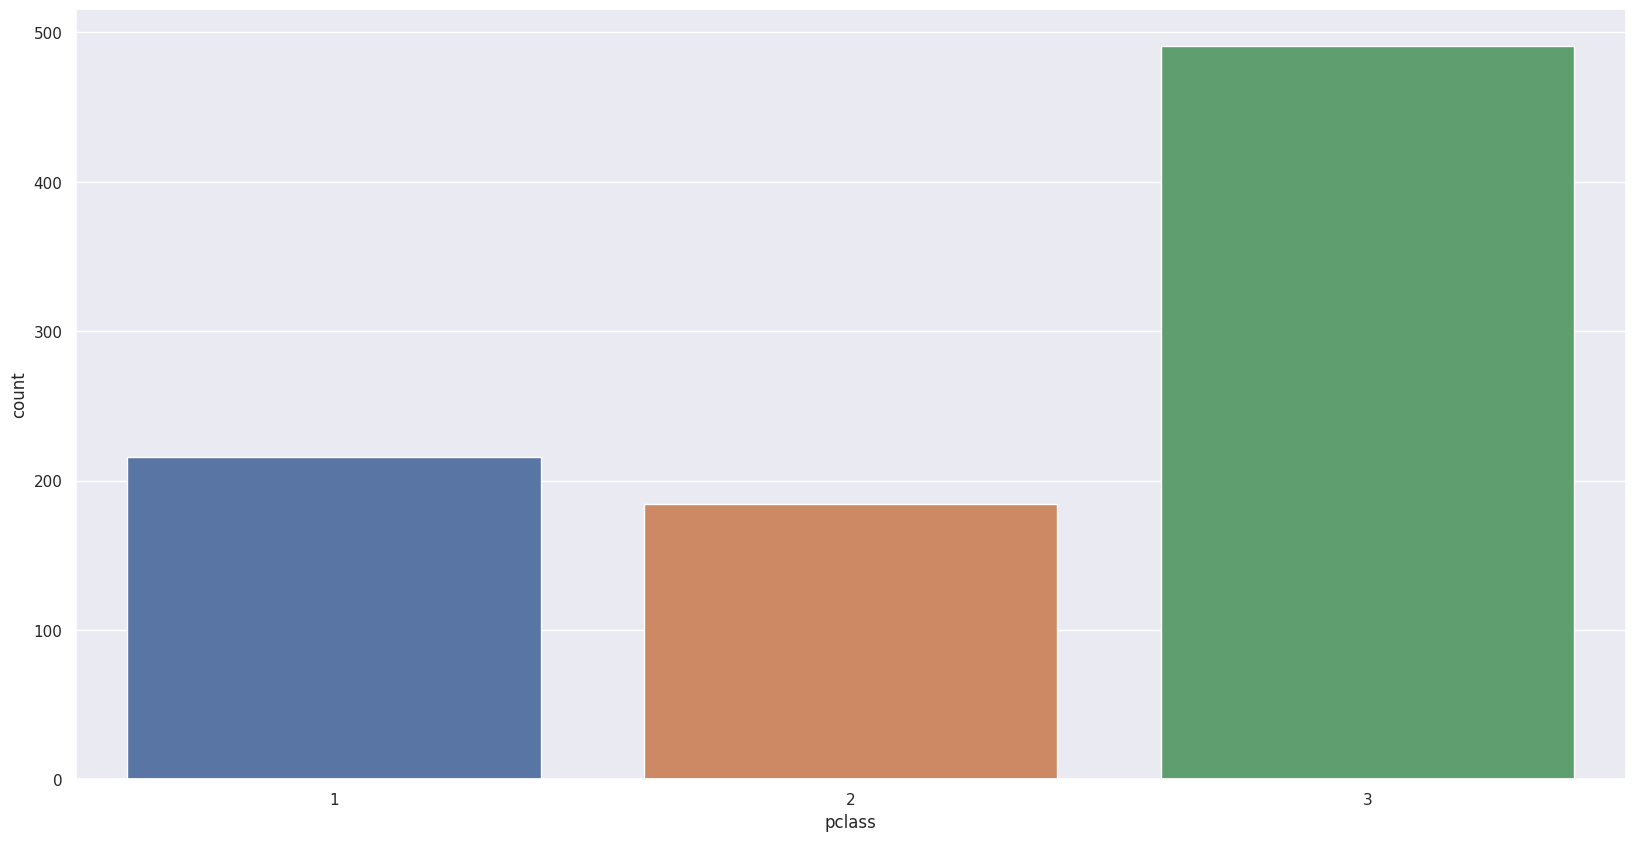

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='pclass', data=df)

5. Handle the Missing values.

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
import numpy as np
df['age']=df['age'].replace(np.NaN,df['age'].mean())

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df['deck']=df['deck'].fillna('U')

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

6. Find the outliers and replace the outliers


In [ ]:
q1 = df["fare"].quantile(0.25)
q2 = df["fare"].quantile(0.75)
IQR = q2 - q1

In [ ]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [ ]:
df_new = pd.DataFrame(np.where(df["fare"] > max_limit, max_limit, 
         (np.where(df["fare"] < min_limit, min_limit, df["fare"]))), columns=["fare"])

<ipython-input-55-179351cb5091>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df['fare'], palette="cool")


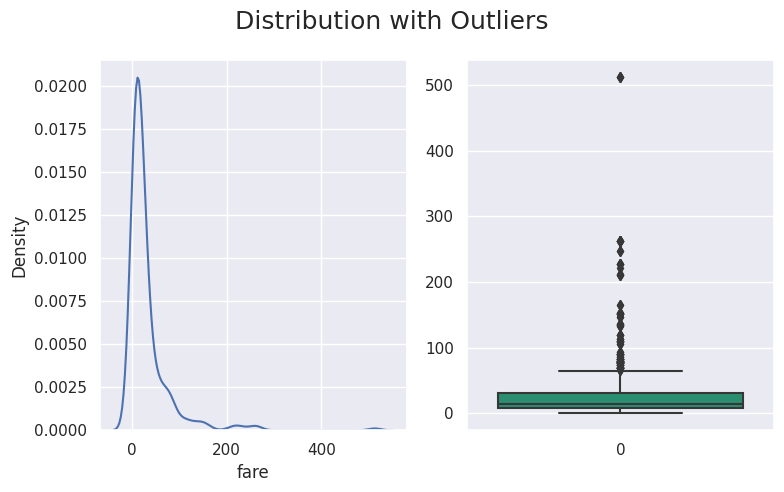

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution with Outliers", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['fare'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df['fare'], palette="Dark2")
plt.tight_layout()
plt.show()

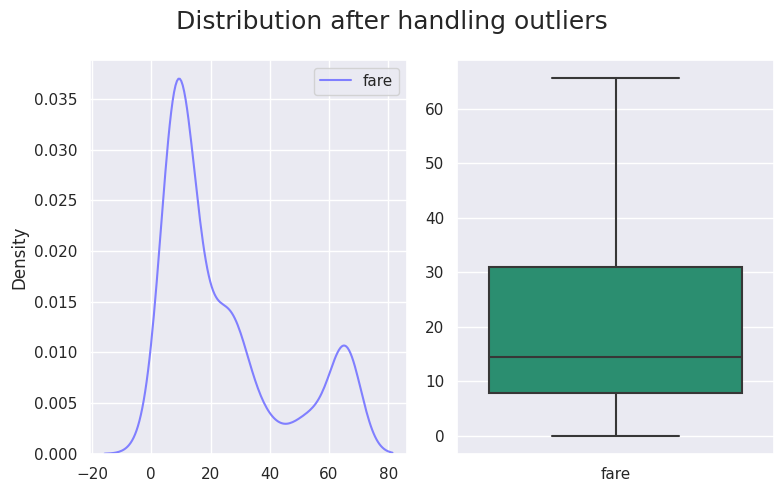

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after handling outliers",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_new, palette="Dark2")
plt.tight_layout()
plt.show()

7. Check for Categorical columns and perform encoding.

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,U,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,U,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,U,Southampton,no


In [ ]:
obj_df['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
obj_df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

In [ ]:
obj_df['class'].value_counts()


Third     491
First     214
Second    184
Name: class, dtype: int64

In [ ]:
obj_df['who'].value_counts()


man      537
woman    269
child     83
Name: who, dtype: int64

In [ ]:
obj_df['deck'].value_counts()


U    688
C     59
B     45
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [ ]:
obj_df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
obj_df['alive'].value_counts()

no     549
yes    340
Name: alive, dtype: int64

In [ ]:
cleanup_nums = {"sex":     {"male": 1, "female": 2},
                "class": {"First": 1, "Second": 2, "Third": 3},
                "alive": {"no":0,"yes":1},
                "who":{ "man":1,"woman":2,"child":3}}

In [ ]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,sex,embarked,class,who,deck,embark_town,alive
0,1,S,3,1,U,Southampton,0
1,2,C,1,2,C,Cherbourg,1
2,2,S,3,2,U,Southampton,1
3,2,S,1,2,C,Southampton,1
4,1,S,3,1,U,Southampton,0


In [ ]:
obj_df["embarked"] = obj_df["embarked"].astype('category')
obj_df["embarked"] = obj_df["embarked"].cat.codes

In [ ]:
obj_df["deck"] = obj_df["deck"].astype('category')
obj_df["deck"] = obj_df["deck"].cat.codes

In [ ]:
obj_df["embark_town"] = obj_df["embark_town"].astype('category')
obj_df["embark_town"] = obj_df["embark_town"].cat.codes

In [ ]:
obj_df.head()

,sex,embarked,class,who,deck,embark_town,alive
0,1,2,3,1,7,2,0
1,2,0,1,2,2,0,1
2,2,2,3,2,7,2,1
3,2,2,1,2,2,2,1
4,1,2,3,1,7,2,0


In [ ]:
obj_df.dtypes

sex            int64
embarked        int8
class          int64
who            int64
deck            int8
embark_town     int8
alive          int64
dtype: object

8. Split the data into dependent and independent variables

In [ ]:
import pandas as pd
obj_df['survived']=df['survived']
X = obj_df.drop('survived', axis=1) 
y = obj_df['survived']  
print('Shape of X:', X.head())
print('Shape of y:', y.head())

Shape of X:    sex  embarked  class  who  deck  embark_town  alive
0    1         2      3    1     7            2      0
1    2         0      1    2     2            0      1
2    2         2      3    2     7            2      1
3    2         2      1    2     2            2      1
4    1         2      3    1     7            2      0
Shape of y: 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


9. Scale the independent variables


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.73534203  0.58683958  0.82520863 ...  0.50939102  0.58683958
  -0.78696114]
 [ 1.35991138 -1.93955453 -1.57221121 ... -1.9305261  -1.93955453
   1.27071078]
 [ 1.35991138  0.58683958  0.82520863 ...  0.50939102  0.58683958
   1.27071078]
 ...
 [ 1.35991138  0.58683958  0.82520863 ...  0.50939102  0.58683958
  -0.78696114]
 [-0.73534203 -1.93955453 -1.57221121 ... -1.9305261  -1.93955453
   1.27071078]
 [-0.73534203 -0.67635748  0.82520863 ...  0.50939102 -0.67635748
  -0.78696114]]


10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 711
No. of testing examples: 178
